<center> <h1><u>EN2550: Assignment 03 on Object Counting on a Conveyor Belt</u></h1>
</center>

* Name: B.S.V.W.Munasinghe
* Index Number: 190397E
* Github repository: https://github.com/vidurawarna/EN2550_CV/tree/main/Assignments/Assignment%203

## <b><u>Connected Component Analysis</u></b>

### <b>(1) Displaying the images</b>

In [1]:
#Importing libraries
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

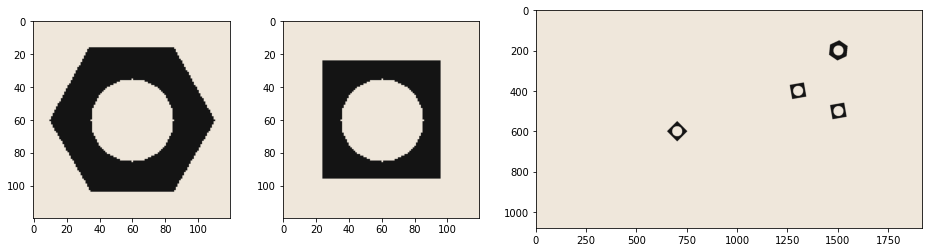

In [3]:
hexnut_template = cv.imread('hexnut_template.png', cv.IMREAD_COLOR)
squarenut_template =  cv.imread('squarenut_template.png', cv.IMREAD_COLOR)
conveyor_f100 =  cv.imread('conveyor_f100.png', cv.IMREAD_COLOR)

images = [hexnut_template,squarenut_template,conveyor_f100]

fig, ax = plt. subplots(1, 3,figsize=(16,4), gridspec_kw={'width_ratios': [1,1,2]})
ax[0].imshow(cv.cvtColor(hexnut_template, cv.COLOR_RGB2BGR))
ax[1].imshow(cv.cvtColor(squarenut_template, cv.COLOR_RGB2BGR))
ax[2].imshow(cv.cvtColor(conveyor_f100, cv.COLOR_RGB2BGR))
plt.show()

### <b>(2) Apply Otsu's thresholding to obtain the binarized images</b>

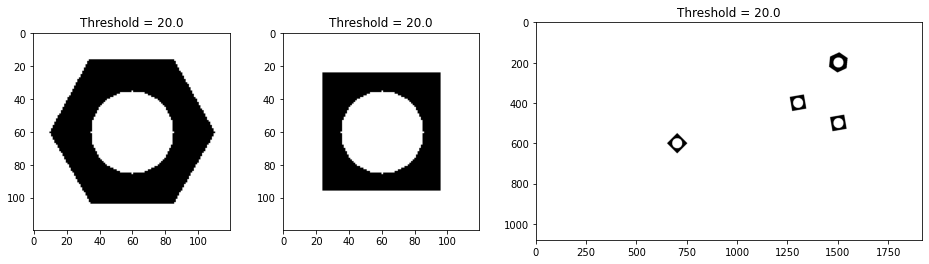

In [4]:
hexnut_grey = cv.imread('hexnut_template.png', cv.IMREAD_GRAYSCALE)
squarenut_grey =  cv.imread('squarenut_template.png', cv.IMREAD_GRAYSCALE)
conveyor_f100_grey =  cv.imread('conveyor_f100.png', cv.IMREAD_GRAYSCALE)
conveyor_f101_grey =  cv.imread('conveyor_f101.png', cv.IMREAD_GRAYSCALE)

greys = [hexnut_grey,squarenut_grey,conveyor_f100_grey]

otsu_images = []
fig, ax = plt.subplots(1, 3,figsize=(16,4), gridspec_kw={'width_ratios': [1,1,2]})

for i in range(3):    
    val,th = cv.threshold(greys[i],0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
    otsu_images.append(th)
    ax[i].imshow(cv.cvtColor(th, cv.COLOR_RGB2BGR))
    ax[i].set_title("Threshold = "+str(val))
  
plt.show()

### <b>(3) Morphological closing to remove small holes inside the foreground using a 3×3 kernel.</b>

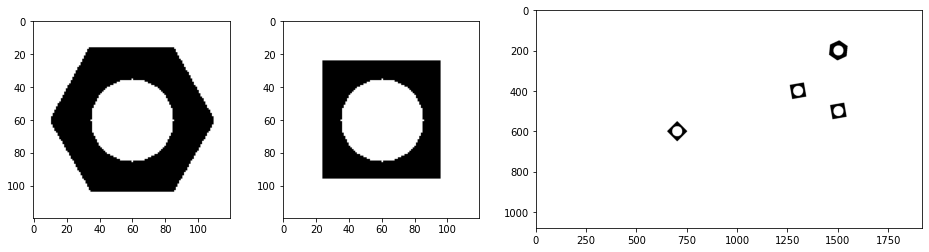

In [5]:
morph_kernal = np.ones((3,3),np.uint8)
morph_images = []

fig, ax = plt. subplots(1, 3,figsize=(16,4), gridspec_kw={'width_ratios': [1,1,2]})

for i in range(3):    
    m1 = cv.morphologyEx(otsu_images[i], cv.MORPH_CLOSE, morph_kernal)
    morph_images.append(m1)
    ax[i].imshow(cv.cvtColor(m1, cv.COLOR_RGB2BGR))
    
plt.show()

### <b>(4) Connected components analysis</b>

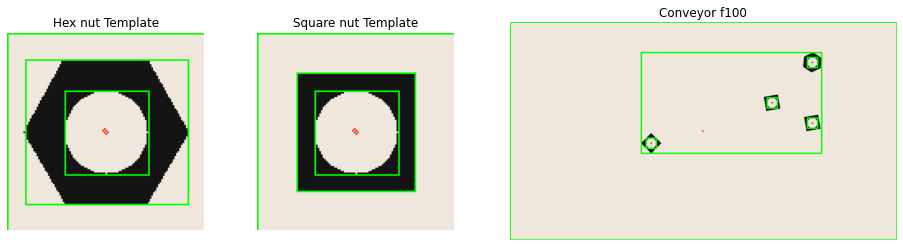

In [6]:
line_widths = [1,1,5]
names = ['Hex nut Template','Square nut Template','Conveyor f100']
# Final output is written to a text file as html, so we can see the statistics more clearly
f = open("output.txt",'w')
f.write("")
f.close()
f = open("output.txt",'a')

fig, ax = plt.subplots(1, 3,figsize=(16,4), gridspec_kw={'width_ratios': [1,1,2]})

f.write("<ol>")
for i in range(3):
    # Calling the function connectedComponentsWithStats() to get the results
    (no_Labels, labels, stats, centroids) = cv.connectedComponentsWithStats(morph_images[i], 4, cv.CV_32S)
    
    f.write("<li>Image Name: " + names[i]+"<br><ul><li> Number of conected components: "+str(no_Labels)+"</li>")
    f.write("<li>Statistics: </li></ul>")
    f.write("<table>")
    f.write("<tr><th>Component</th><th>Left</th><th>Top</th><th>Width</th><th>Height</th><th>Area</th><th>Centroid</th></tr>")
    
    output = images[i].copy()
       
    for j in range(no_Labels):
        # unpacking the data in statistics
        x = stats[j, cv.CC_STAT_LEFT]
        y = stats[j, cv.CC_STAT_TOP]
        w = stats[j, cv.CC_STAT_WIDTH]
        h = stats[j, cv.CC_STAT_HEIGHT]
        area = stats[j, cv.CC_STAT_AREA]
        (cX, cY) = centroids[j]
        cv.rectangle(output, (x, y), (x + w, y + h), (0, 255, 0), line_widths[i])
        cv.circle(output, (int(cX), int(cY)), 1, (0, 0, 255), line_widths[i])
        row = "<tr><td>"+str(j+1)+"</td><td>"+str(x)+"</td><td>"+str(y)+"</td><td>"+str(w)+"</td><td>"+str(h)+"</td><td>"+str(area)+"</td><td>("+str(cX)+","+str(cY)+")</td></tr>"
        f.write(row)

        ax[i].imshow(cv.cvtColor(output, cv.COLOR_RGB2BGR))
        ax[i].axis('off')  
        ax[i].set_title(names[i])

    f.write("</table></li>")
    f.write("")
f.write("</ol>")
f.close()

### <b><u>Interpretation of results</u></b>

The function returns parameters relevent to the bounding boxes that has found for each component:
* Left :- x cordinate of the starting point
* Top :- y cordinate of the starting point
* Width 
* Height 
* Area
* Centroid :- Center point 

<ol><li>Image Name: Hex nut Template<br><ul><li> Number of conected components: 3</li><li>Statistics: </li></ul><table><tr><th>Component</th><th>Left</th><th>Top</th><th>Width</th><th>Height</th><th>Area</th><th>Centroid</th></tr><tr><td>1</td><td>11</td><td>16</td><td>99</td><td>88</td><td>4722</td><td>(59.83354510800508,59.22257518000847)</td></tr><tr><td>2</td><td>0</td><td>0</td><td>120</td><td>120</td><td>7717</td><td>(59.168847997926655,59.54269793961384)</td></tr><tr><td>3</td><td>35</td><td>35</td><td>51</td><td>51</td><td>1961</td><td>(60.0,60.0)</td></tr></table></li><li>Image Name: Square nut Template<br><ul><li> Number of conected components: 3</li><li>Statistics: </li></ul><table><tr><th>Component</th><th>Left</th><th>Top</th><th>Width</th><th>Height</th><th>Area</th><th>Centroid</th></tr><tr><td>1</td><td>24</td><td>24</td><td>72</td><td>72</td><td>3223</td><td>(59.19578032888613,59.19578032888613)</td></tr><tr><td>2</td><td>0</td><td>0</td><td>120</td><td>120</td><td>9216</td><td>(59.5,59.5)</td></tr><tr><td>3</td><td>35</td><td>35</td><td>51</td><td>51</td><td>1961</td><td>(60.0,60.0)</td></tr></table></li><li>Image Name: Conveyor f100<br><ul><li> Number of conected components: 6</li><li>Statistics: </li></ul><table><tr><th>Component</th><th>Left</th><th>Top</th><th>Width</th><th>Height</th><th>Area</th><th>Centroid</th></tr><tr><td>1</td><td>651</td><td>151</td><td>895</td><td>499</td><td>13930</td><td>(1275.0211055276382,400.110839913855)</td></tr><tr><td>2</td><td>0</td><td>0</td><td>1920</td><td>1080</td><td>2051826</td><td>(956.2473406614401,540.8840496221414)</td></tr><tr><td>3</td><td>1475</td><td>175</td><td>51</td><td>51</td><td>1961</td><td>(1500.0,200.0)</td></tr><tr><td>4</td><td>1275</td><td>375</td><td>51</td><td>51</td><td>1961</td><td>(1300.0,400.0)</td></tr><tr><td>5</td><td>1475</td><td>475</td><td>51</td><td>51</td><td>1961</td><td>(1500.0,500.0)</td></tr><tr><td>6</td><td>675</td><td>575</td><td>51</td><td>51</td><td>1961</td><td>(700.0,600.0)</td></tr></table></li></ol>

### <b>(5) Contour analysis</b>

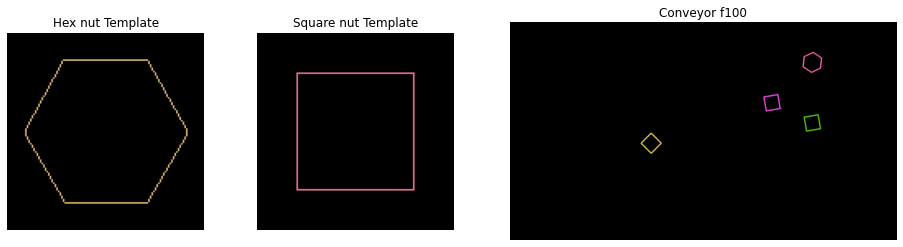

In [7]:
import random
fig, ax = plt.subplots(1, 3,figsize=(16,4), gridspec_kw={'width_ratios': [1,1,2]}) 
line_widths = [1,1,5]

for i in range(3):
    
    im_copy = np.zeros((images[i].shape[0],images[i].shape[1],3), np.uint8)
    # Finding contours of the binarized images
    contours, hierarchy = cv.findContours(255-morph_images[i], cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

    for k in range(len(contours)):
        # Draw each contour using random colors
        R,G,B = random.randint(0,256),random.randint(0,256),random.randint(0,256)
        cv.drawContours(im_copy, [contours[k]], 0, (R,G,B), line_widths[i])
    
        ax[i].imshow(cv.cvtColor(im_copy, cv.COLOR_RGB2BGR))
        ax[i].axis('off')  
        ax[i].set_title(names[i])

## <b><u>Detecting Objects on a Synthetic Conveyor</u></b>

### <b>(1) Playing the sequence</b>

In [223]:
cv.namedWindow('Conveyor', cv.WINDOW_NORMAL)
cap = cv.VideoCapture('conveyor.mp4')
f = 0
frame = []      
while cap.isOpened():                                    
    ret, frame = cap.read()
    if not ret:
        print("Can't receive frame (stream end?). Exiting.")
        break

    f += 1
    text = 'Frame:' + str(f)
    cv.putText(frame,text , (100, 100), cv.FONT_HERSHEY_COMPLEX, 1, (0,250,0), 1, cv.LINE_AA)
    cv.imshow('Conveyor', frame)

    if cv.waitKey(1) == ord('q'):  
        break

cap.release()
cv.destroyAllWindows()

### <b>(2) Counting hexagonal nuts in one frame</b>

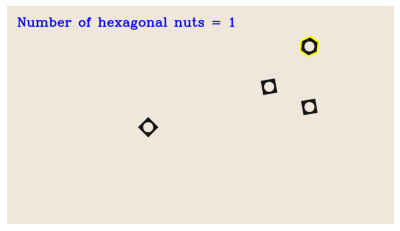

In [8]:
source = 255-morph_images[0]
target = 255-morph_images[2]

#find contours of the source image
src_cnt, src_hi = cv.findContours(source, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

#Find contours of the target image
tar_cnt, tar_hi = cv.findContours(target, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

#Selecting the best matches
best_fit = []
for cnt in tar_cnt:
    match = cv.matchShapes(src_cnt[0],cnt,1,0.0)
    if match<0.02:
        best_fit.append(cnt)

fig, ax = plt.subplots(figsize=(8,4))         
im_copy = images[2].copy()
text = "Number of hexagonal nuts = %d"%len(best_fit)
cv.putText(im_copy,text , (50,100), cv.FONT_HERSHEY_COMPLEX, 2, (255,0,0), 4, cv.LINE_AA)

for k in range(len(best_fit)):
    cv.drawContours(im_copy, [best_fit[k]], 0, (0,255,255), 8)

    ax.imshow(cv.cvtColor(im_copy, cv.COLOR_RGB2BGR))
    ax.axis('off')  

### <b>(3) Counting the number of objects that were conveyed along the conveyor belt</b>

In [9]:
# Reading the video and check frame by frame for objects
frame_array = []
shape = (1080, 1920, 3)
morph_kernal = np.ones((3,3),np.uint8)

# Find contours of the source images
sqr_cnt, sqr_hi = cv.findContours(255-morph_images[1], cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
hex_cnt, hex_hi = cv.findContours(255-morph_images[0], cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

total, hex_total, sqr_total = 0, 0, 0
pre_sqr_tot, pre_hex_tot, pre_frame_tot = 0, 0, 0
cap = cv.VideoCapture('conveyor.mp4')
frame = []    
  
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    
    #Covert the frame into binary image and finding contours
    grey_frame = cv.cvtColor(frame,cv.COLOR_RGB2GRAY)
    val,bin_frame = cv.threshold(grey_frame,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
    bin_frame = cv.morphologyEx(bin_frame, cv.MORPH_CLOSE, morph_kernal)
    tar_cnt, tar_hi = cv.findContours(255-bin_frame, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
    # Lists to store the best fit figures seperately
    best_fit_sqr = []
    best_fit_hex = []
    
    for cnt in tar_cnt:
        match1 = cv.matchShapes(sqr_cnt[0],cnt,1,0.0)
        match2 = cv.matchShapes(hex_cnt[0],cnt,1,0.0)
        area1 = abs(cv.contourArea(cnt)-cv.contourArea(sqr_cnt[0]))
        area2 = abs(cv.contourArea(cnt)-cv.contourArea(hex_cnt[0]))
        # checking the closeness using matchShapes() and area of the contours
        # And draw the contours which are the best matches
        if match1 < 0.02 and area1<150: 
            best_fit_sqr.append(cnt)
            cv.drawContours(frame, [cnt], 0, (255,255,0), 3)         
        if match2 < 0.02 and area2<100:
            best_fit_hex.append(cnt)
            cv.drawContours(frame, [cnt], 0, (0,255,255), 3)
    
    # Updating the counts of hex, square nuts    
    sqr_tot = len(best_fit_sqr)
    hex_tot = len(best_fit_hex)
          
    if (sqr_tot + hex_tot)>pre_frame_tot:
        total+=(sqr_tot + hex_tot - pre_frame_tot)
        if sqr_tot>pre_sqr_tot: sqr_total += 1        
        elif hex_tot>pre_hex_tot: hex_total += 1
            
    pre_sqr_tot, pre_hex_tot  = sqr_tot, hex_tot
    pre_frame_tot = sqr_tot + hex_tot
    
    # Writing the new frames with object counts
    text = "Current frame: Square(%d)+Hex(%d) = %d"%(sqr_tot,hex_tot,(sqr_tot + hex_tot))   
    text2 = "Overall: Square(%d)+Hex(%d) = %d"%(sqr_total,hex_total,total)           
    cv.putText(frame,text , (100, 50), cv.FONT_HERSHEY_COMPLEX, 1, (255,0,0), 2, cv.LINE_AA)
    cv.putText(frame,text2 , (100, 100), cv.FONT_HERSHEY_COMPLEX, 1, (255,0,0), 2, cv.LINE_AA)
    frame_array.append(frame)     
cap.release()

# Writing the video
out = cv.VideoWriter('./conveyor_result_190397E.mp4',cv.VideoWriter_fourcc(*'h264'), 30, (shape[1], shape[0]))
for i in range(len(frame_array)):
    cv.imshow('Frame', frame_array[i])
    if cv.waitKey(1) == ord('q'):
        break
    out.write(frame_array[i])
out.release()
cv.destroyAllWindows()